[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sailesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


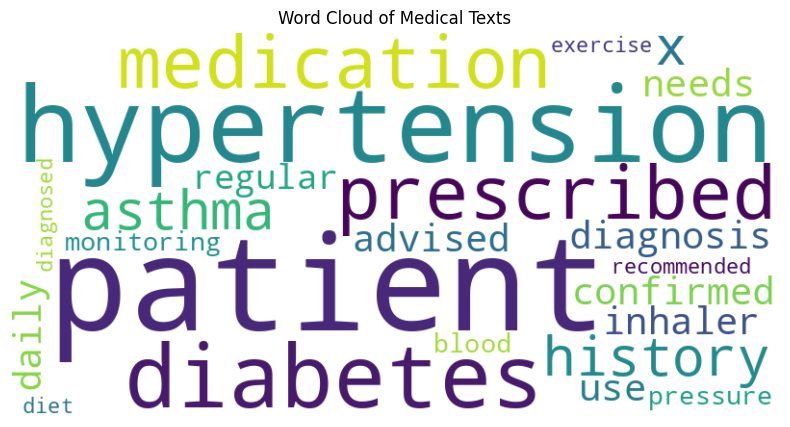

                                         MedicalText  \
0  Patient has a history of hypertension and diab...   
1  Asthma diagnosis confirmed. Patient advised to...   
2  Hypertension patient. Needs regular monitoring...   
3   Diabetes patient. Recommended diet and exercise.   
4  Patient diagnosed with hypertension. Medicatio...   

                            Insights  
0     {'Entities': [('X.', 'NORP')]}  
1  {'Entities': [('daily', 'DATE')]}  
2                   {'Entities': []}  
3                   {'Entities': []}  
4                   {'Entities': []}  


In [3]:
import pandas as pd
import numpy as np
import re
import nltk
import spacy
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download necessary NLTK resources
nltk.download('stopwords')

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Sample medical text data
medical_texts = [
    "Patient has a history of hypertension and diabetes. Prescribed medication X.",
    "Asthma diagnosis confirmed. Patient advised to use inhaler daily.",
    "Hypertension patient. Needs regular monitoring of blood pressure.",
    "Diabetes patient. Recommended diet and exercise.",
    "Patient diagnosed with hypertension. Medication Y prescribed."
]
medical_df = pd.DataFrame({'MedicalText': medical_texts})

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\W+', ' ', text)  # Remove non-word characters
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

# Apply preprocessing
medical_df['CleanedText'] = medical_df['MedicalText'].apply(preprocess_text)

# Extract named entities using spaCy
def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

medical_df['Entities'] = medical_df['MedicalText'].apply(extract_entities)

# Generate word cloud from cleaned text
all_text = ' '.join(medical_df['CleanedText'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Medical Texts')
plt.show()

# Extract basic insights
def extract_insights(row):
    return {
        'Entities': row['Entities']
    }

medical_df['Insights'] = medical_df.apply(extract_insights, axis=1)

# Display final results
print(medical_df[['MedicalText', 'Insights']])
